In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [19]:
import tensorflow as tf

In [20]:
print(tf.__version__)

2.1.0


In [21]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
from os.path import join
from matplotlib import pyplot as plt

## Prepare the Data

In [22]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   zoom_range=0.15)
validation_data_gen = ImageDataGenerator(rescale = 1./255)

In [23]:
train_path = 'cats_vs_dogs_dataset/training'
validation_path = 'cats_vs_dogs_dataset/validation'

In [24]:
num_cat_train_im = len(listdir(join(train_path, 'cats')))
num_dog_train_im = len(listdir(join(train_path, 'dogs')))
num_cat_val_im = len(listdir(join(validation_path, 'cats')))
num_dog_val_im = len(listdir(join(validation_path, 'dogs')))
print(num_cat_train_im)
print(num_dog_train_im)
print(num_cat_val_im)
print(num_dog_val_im)

4000
4000
1000
1000


In [25]:
num_train_im = num_cat_train_im + num_dog_train_im
num_val_im = num_cat_val_im + num_dog_val_im

In [26]:
img_height = 64
img_width = 64
num_channels = 3

In [28]:
training_data = train_data_gen.flow_from_directory(train_path,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

validation_data = validation_data_gen.flow_from_directory(validation_path,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [29]:
examp_images, _ = next(training_data)

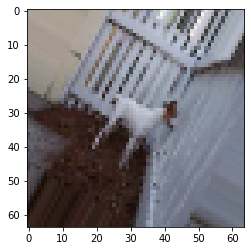

In [30]:
plt.imshow(examp_images[0])

## Create Model

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(1,1), kernel_initializer='he_uniform', input_shape=(img_height, img_width, num_channels), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)      

## Compile Model

In [33]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

## Train Model

In [ ]:
batch_size = 32
epochs = 10

In [34]:
model.fit_generator(training_data,
                   steps_per_epoch = int(num_train_im / batch_size),
                   epochs = epochs,
                   validation_data = validation_data,
                   validation_steps = int(num_val_im / batch_size))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 62 steps
Epoch 1/10
250/250 [==============================] - 27s 107ms/step - loss: 0.7688 - accuracy: 0.5335 - val_loss: 0.6744 - val_accuracy: 0.5837
Epoch 2/10
250/250 [==============================] - 25s 99ms/step - loss: 0.6776 - accuracy: 0.5615 - val_loss: 0.6678 - val_accuracy: 0.5963
Epoch 3/10
250/250 [==============================] - 25s 99ms/step - loss: 0.6667 - accuracy: 0.5945 - val_loss: 0.6475 - val_accuracy: 0.6300
Epoch 4/10
250/250 [==============================] - 25s 98ms/step - loss: 0.6317 - accuracy: 0.6490 - val_loss: 0.6023 - val_accuracy: 0.6890
Epoch 5/10
250/250 [==============================] - 25s 99ms/step - loss: 0.5985 - accuracy: 0.6810 - val_loss: 0.5685 - val_accuracy: 0.7117
Epoch 6/10
250/250 [==============================] - 24s 97ms/step - loss: 0.5798 - accuracy: 0.6950 - val_loss: 0.5442 - val_accuracy: 0.7243
Epoch 7/10
250/250 [======================